# Importing Libraries 

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data Preprocessing 

### 1. Loading Data 

In [33]:
df = pd.read_csv(r"D:\Lin Red using Numpy\HappinessAlcoholConsumption.csv", usecols = ['Country','Beer_PerCapita','Spirit_PerCapita','Wine_PerCapita','HappinessScore'])

df.head()

,Country,HappinessScore,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita
0,Denmark,7.526,224,81,278
1,Switzerland,7.509,185,100,280
2,Iceland,7.501,233,61,78
3,Norway,7.498,169,71,129
4,Finland,7.413,263,133,97


### 2. Checking Data Types of Columns

In [34]:
df.dtypes

Country              object
HappinessScore      float64
Beer_PerCapita        int64
Spirit_PerCapita      int64
Wine_PerCapita        int64
dtype: object

### 3. Finding Total Alcohol Consumption

In [35]:
df['Alcohol_consumption'] = df['Beer_PerCapita'] + df['Spirit_PerCapita'] + df['Wine_PerCapita']

df.sample(5)

,Country,HappinessScore,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita,Alcohol_consumption
66,Turkey,5.389,51,22,7,80
61,Paraguay,5.538,213,117,74,404
2,Iceland,7.501,233,61,78,372
98,Dem. Rep. Congo,4.272,32,3,1,36
15,Brazil,6.952,245,145,16,406


In [36]:
df = df.drop(columns = ['Beer_PerCapita','Spirit_PerCapita','Wine_PerCapita'])

df.sample(5)

,Country,HappinessScore,Alcohol_consumption
21,United Kingdom,6.725,540
58,Mauritius,5.648,147
22,Chile,6.705,426
38,Venezuela,6.084,436
4,Finland,7.413,493


### 4. Filtering Data to work on

In [37]:
filtered_df = df[['Alcohol_consumption','HappinessScore']]
filtered_df.head()

,Alcohol_consumption,HappinessScore
0,583,7.526
1,565,7.509
2,372,7.501
3,369,7.498
4,493,7.413


# Working With NumPy 

### 1. Transforming Data into a Matrix

In [38]:
matrix = np.array(filtered_df.values,'float')
matrix[0:5,:]

array([[583.   ,   7.526],
       [565.   ,   7.509],
       [372.   ,   7.501],
       [369.   ,   7.498],
       [493.   ,   7.413]])

### 2. Declaring Independent(X) and Dependent(Y) Variables

In [39]:
X = matrix[:,0]
Y = matrix[:,1]


# Visualization 

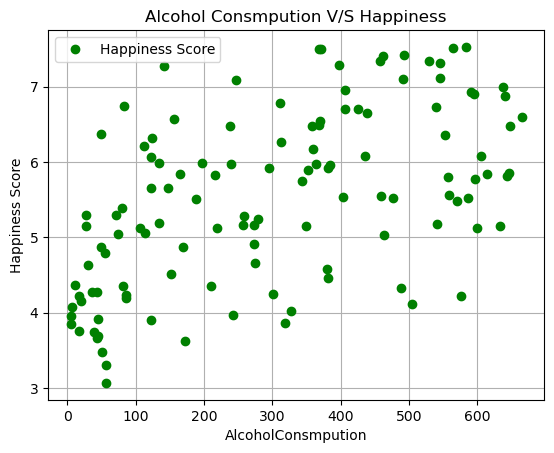

In [40]:
plt.plot(X,Y,'go')                             # plots graph
plt.title('Alcohol Consmpution V/S Happiness') # Sets title of the graph
plt.xlabel("AlcoholConsmpution")               # label x-axis
plt.ylabel('Happiness Score')                  # Label y-axis
plt.legend(['Happiness Score'])                # display legend
plt.grid()                                     # showa
plt.show()

# Applying Linear Regression From Scratch

## The Equation of Linear Regression is, $(y - y1) = byx(x - x1)$

### where, 
             byx is slope of the equation
                      byx = (ΣXY - (ΣXΣY)/n) / Σ(X^2) - ((ΣX)^2)/n
             y1 is mean of dependent variable
             x1 is mean of independent variable

In [41]:
X_squared = np.sum(X ** 2)
Y_squared = np.sum(Y ** 2)
sum_XY = np.sum(X * Y)
D = (np.sum(X) * np.sum(Y))/X.size
sum_X = (np.sum(X) ** 2)/X.size
sum_Y = (np.sum(Y) ** 2)/Y.size

In [42]:
b_YX = (sum_XY - D)/(X_squared - sum_X)
print(b_YX)

0.0030658252248615347


In [43]:
y = b_YX * (X- np.mean(X)) + np.mean(Y)

# Plotting Line 

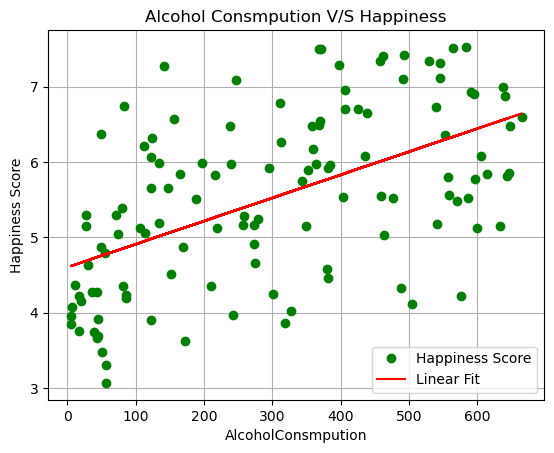

In [44]:
plt.figure()
plt.plot(X,Y,'go',label = 'Training Data')
plt.title('Alcohol Consmpution V/S Happiness')
plt.xlabel("AlcoholConsmpution")
plt.ylabel('Happiness Score')
plt.plot(X,y,'r', label = 'Linear Regression')
plt.legend(['Happiness Score','Linear Fit'])
plt.grid()
plt.show()

# Mean Square Error 

In [45]:
MSE = np.sum((Y - y) ** 2)/X.size
print(MSE)

0.9165196840348291
